# Updated Analysis with Final Screen Time Dataset

In [5]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

df = pd.read_csv('screen_time_mood_data_final.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Total_Screen_Minutes,Unlocks,Stress_Score,Mood_Score,Mood_Category,Avg_Temperature_C,Precipitation_mm
0,2024-01-01,209,87,5.7,2.1,Negative,16.843225,1.059860
1,2024-01-02,171,84,2.7,3.4,Neutral,6.861446,2.404696
2,2024-01-03,218,98,5.3,4.0,Positive,15.706203,0.297819
3,2024-01-04,271,92,6.6,3.1,Neutral,3.447352,0.284845
4,2024-01-05,165,60,6.1,2.5,Negative,12.594892,6.982476


In [6]:
# Assume df is already loaded and enriched from earlier steps.
df = pd.read_csv('screen_time_mood_data_final.csv')
df.head()

,Date,Total_Screen_Minutes,Unlocks,Stress_Score,Mood_Score,Mood_Category,Avg_Temperature_C,Precipitation_mm
0,2024-01-01,209,87,5.7,2.1,Negative,16.843225,1.059860
1,2024-01-02,171,84,2.7,3.4,Neutral,6.861446,2.404696
2,2024-01-03,218,98,5.3,4.0,Positive,15.706203,0.297819
3,2024-01-04,271,92,6.6,3.1,Neutral,3.447352,0.284845
4,2024-01-05,165,60,6.1,2.5,Negative,12.594892,6.982476


## Exploratory Data Analysis

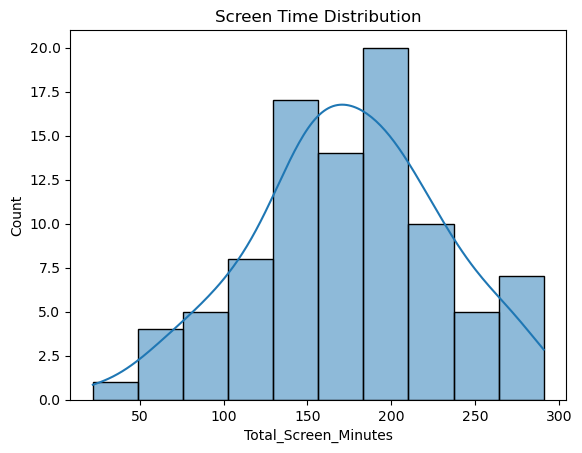

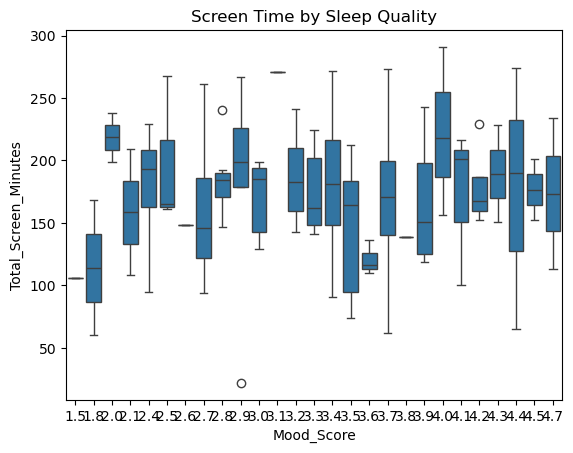

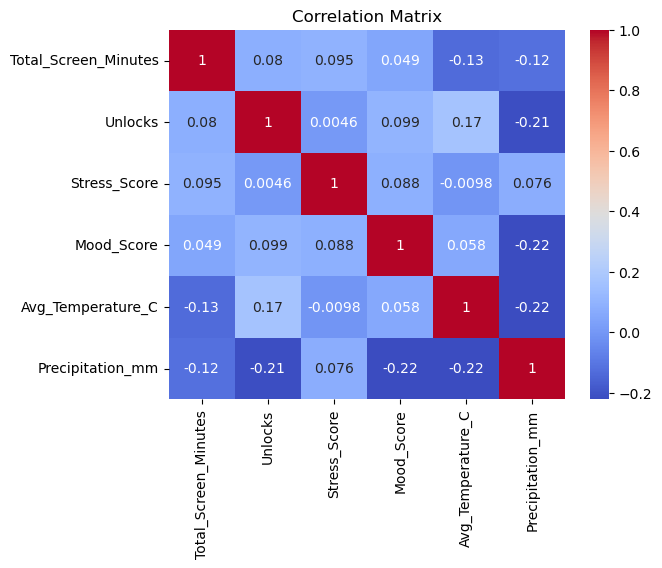

In [11]:

sns.histplot(df['Total_Screen_Minutes'], kde=True)
plt.title('Screen Time Distribution')
plt.show()

sns.boxplot(x='Mood_Score', y='Total_Screen_Minutes', data=df)
plt.title('Screen Time by Sleep Quality')
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


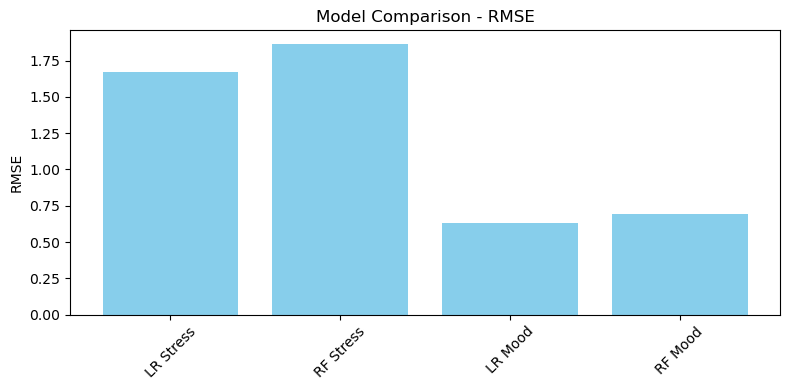

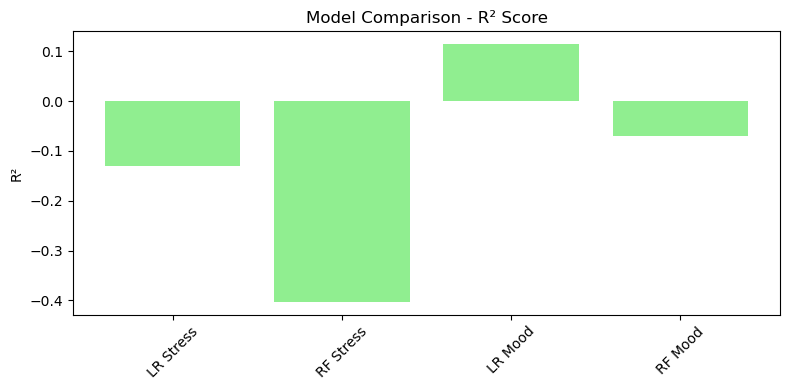

In [22]:
# Re-import necessary libraries after kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

# Reload the final dataset
df = pd.read_csv("screen_time_mood_data_final.csv")

# Encode categorical mood category for prediction
df['Mood_Category_Encoded'] = df['Mood_Category'].map({'Negative': 1, 'Neutral': 2, 'Positive': 3})

# Prepare features and targets
features = ['Total_Screen_Minutes', 'Unlocks', 'Avg_Temperature_C', 'Precipitation_mm']
X = df[features]
y_stress = df['Stress_Score']
y_mood = df['Mood_Category_Encoded']

# Split data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_stress, test_size=0.2, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y_mood, test_size=0.2, random_state=42)

# Initialize models
lr_stress = LinearRegression()
rf_stress = RandomForestRegressor(random_state=42)
lr_mood = LinearRegression()
rf_mood = RandomForestRegressor(random_state=42)

# Fit models
lr_stress.fit(X_train_s, y_train_s)
rf_stress.fit(X_train_s, y_train_s)
lr_mood.fit(X_train_m, y_train_m)
rf_mood.fit(X_train_m, y_train_m)

# Predict
pred_stress_lr = lr_stress.predict(X_test_s)
pred_stress_rf = rf_stress.predict(X_test_s)
pred_mood_lr = lr_mood.predict(X_test_m)
pred_mood_rf = rf_mood.predict(X_test_m)

# Evaluate
results = pd.DataFrame({
    'Model': ['LR Stress', 'RF Stress', 'LR Mood', 'RF Mood'],
    'RMSE': [
        root_mean_squared_error(y_test_s, pred_stress_lr),
        root_mean_squared_error(y_test_s, pred_stress_rf),
        root_mean_squared_error(y_test_m, pred_mood_lr),
        root_mean_squared_error(y_test_m, pred_mood_rf)
    ],
    'R2': [
        r2_score(y_test_s, pred_stress_lr),
        r2_score(y_test_s, pred_stress_rf),
        r2_score(y_test_m, pred_mood_lr),
        r2_score(y_test_m, pred_mood_rf)
    ]
})

# RMSE Barplot
plt.figure(figsize=(8, 4))
plt.bar(results['Model'], results['RMSE'], color='skyblue')
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# R2 Barplot
plt.figure(figsize=(8, 4))
plt.bar(results['Model'], results['R2'], color='lightgreen')
plt.title('Model Comparison - R² Score')
plt.ylabel('R²')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()